<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%93%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%2C_%D0%B3%D0%B8%D0%B4%D1%80%D0%BE%D0%BF%D0%BE%D0%BD%D0%B8%D0%BA%D0%B0_%D0%B8_%D0%BC%D0%B5%D0%B4%D0%B8%D1%86%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%B0%D1%80%D0%B8%D1%85%D1%83%D0%B0%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глубокое обучение, гидропоника и медицинская марихуана

# Deep Learning, Hydroponics & Medical Marijuana

В этом уроке мы кратко обсудим концепцию гидропонных ферм, их связь с марихуаной и то, как глубокое обучение пересекается с ними обоими.


In this tutorial, we will briefly discuss the concept of hydroponic farms, their relationship to marijuana, and how deep learning intersects with both.



Мы реализуем сверточную нейронную сеть с Keras, чтобы автоматически классифицировать здоровье корней растений, выращенных в гидропонной системе, без необходимости физически прикасаться к растению или мешать ему.

We will implement a convolutional neural network with Keras to automatically classify the health of the roots of hydroponically grown plants without having to physically touch or interfere with the plant.


Гидропоника - это часть гидрокультуры , процесса выращивания растений без использования почвы и вместо этого с использованием богатых минералами растворов в водном растворителе. Гидропоника широко используется в индустрии марихуаны, даже до принятия закона о легализации (в некоторых штатах) в Соединенных Штатах.


Hydroponics is part of hydroculture, the process of growing plants without using soil and instead using mineral-rich solutions in an aqueous solvent. Hydroponics is widely used in the marijuana industry, even before legalization laws (in some states) were passed in the United States.


Связь гидропоники и медицинской марихуаны:

The relationship between hydroponics and medical marijuana:

* До легализации марихуаны (в некоторых штатах США) производители хотели бы хранить свои растения в секрете и в безопасности - выращивание в закрытых помещениях с использованием гидропоники помогло решить эту проблему. Before the legalization of marijuana (in some states in the US) growers wanted to keep their plants secret and safe - indoor growing using hydroponics helped solve this problem.
* Законы о медицинской марихуане являются новыми в Соединенных Штатах, и в некоторых случаях единственный разрешенный метод выращивания - гидропонный. Medical marijuana laws are new in the United States, and in some cases, the only permitted growing method is hydroponic.
* Гидропонное выращивание может помочь сохранить нашу ценную почву, на естественное восполнение которой могут потребоваться десятилетия или даже больше. Hydroponic cultivation can help preserve our valuable soil, which can take decades or more to replenish naturally.

Общая цель проекта заключается в разработке автоматизированной системы анализа роста корней, способной точно измерить корни с обнаружением любых проблем роста.

The overall goal of the project is to develop an automated root growth analysis system capable of accurately measuring roots with the detection of any growth problems.




Корни необходимо разделить на две группы:

The roots must be divided into two groups:

* «Волосатые» корни. "Hairy" roots
* «Неволосатые» корни. "Non-hairy" roots






Чем «волосатее» корень, тем лучше корень может всасывать питательные вещества.
Чем «менее волосатым» является корень, тем меньше питательных веществ он может потреблять, что может привести к голоду и гибели растения.

The “hairier” the root, the better the root can absorb nutrients.
The "less hairy" the root is, the less nutrients it can consume, which can lead to hunger and plant death.




Для этого нужно применить компьютерное зрение, чтобы классифицировать корень по одной из двух категорий. В этом уроке вы узнаете, как обучить глубокую сеть автоматической классификации каждого из этих классов корневых видов.



This requires the use of computer vision to classify the root into one of two categories. In this tutorial, you will learn how to train a deep web to automatically classify each of these root species classes.

### Установка необходимых библиотек

### Install the necessary packages

In [1]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 454 kB 57.5 MB/s 
     |████████████████████████████████| 3.0 MB 51.7 MB/s 
     |████████████████████████████████| 2.9 MB 51.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

### Загрузка файлов
### Download the code zip file

In [2]:
!wget http://dataudt.ru/datasets/cv/Lesson_20.dl_medical_marijuana.zip
!unzip -qq Lesson_20.dl_medical_marijuana.zip
%cd /content/Lesson_20.dl_medical_marijuana/

--2022-02-17 18:53:19--  http://dataudt.ru/datasets/cv/Lesson_20.dl_medical_marijuana.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20630089 (20M) [application/zip]
Saving to: ‘Lesson_20.dl_medical_marijuana.zip’

Lesson_20.dl_medica 100%[===================>]  19.67M  10.7MB/s    in 1.8s    

2022-02-17 18:53:22 (10.7 MB/s) - ‘Lesson_20.dl_medical_marijuana.zip’ saved [20630089/20630089]

/content/Lesson_20.dl_medical_marijuana


### Импорт библиотек
### Import Packages

In [3]:
# импортируем необходимые библиотеки
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from network.simplenet import SimpleNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from imutils import build_montages
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

### Функция отображения изображений в Jupyter Notebooks и Google Colab
### Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
    # конвертируем изображение из формата BGR в RGB и отображаем его 
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(10,10)) 
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Реализация нашей сверточной сети
### Implementing our Convolutional Neural Network

In [5]:
class SimpleNet:
	@staticmethod
	def build(width, height, depth, classes, reg):
        # инициализируем модель вместе с формой входа как
		# "каналы последние" и сам размер каналов
		# initialize the model along with the input shape to be
		# "channels last"
		model = Sequential()
		inputShape = (height, width, depth)

        # если мы используем "каналы первые", то обновим форму входа
		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

        # первый набор: свертка => функция активации RELU => пулинг
		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(64, (11, 11), input_shape=inputShape,
			padding="same", kernel_regularizer=reg))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

        # второй набор: свертка => функция активации RELU => пулинг
		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(128, (5, 5), padding="same",
			kernel_regularizer=reg))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

        # третий (и последний) набор: свертка => функция активации RELU => пулинг
		# third (and final) CONV => RELU => POOL layers
		model.add(Conv2D(256, (3, 3), padding="same",
			kernel_regularizer=reg))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

        # первый (и единственный) слой FC => слои RELU
		# first and only set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512, kernel_regularizer=reg))
		model.add(Activation("relu"))
		model.add(Dropout(0.5))

        # softmax классификатор
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

        # возвращаем построенную архитектуру сети
		# return the constructed network architecture
		return model

### Реализация сценария драйвера


### Implementing the driver script

In [6]:
# явно укажем аргументы необходимые для работы
# dataset - путь к входному набору данных
# epochs - количество эпох для обучения нашей сети
# plot - путь к графику потерь/точности на выходе

# explicitly specify the arguments needed to work
# dataset - path to input dataset
# epochs - number of epochs to train our network for
# plot - path to output loss/accuracy plot
args = {
	"dataset": "dataset",
	"epochs": 100,
	"plot": "plot.png"
}

In [7]:
# возьмем список изображений в директории нашего датасета, затем инициализируем
# список данных (т.е. изображений) и классов изображений
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

# перебираем пути к изображениям
# loop over the image paths
for imagePath in imagePaths:
    # извлекаем метку класса из имени файла
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

    # загружаем изображение, преобразоваем его в оттенки серого и изменяем его размер до
	# 64x64 пикселей, без учета соотношения сторон
	# load the image, convert it to grayscale, and resize it to be a
	# fixed 64x64 pixels, ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	image = cv2.resize(image, (64, 64))

    # обновляем списки данных и меток соответственно
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

[INFO] loading images...


In [8]:
# конвертируем данные в массив NumPy, затем масштабируем
# все пиксели яркости в диапазоне [0, 1]
# convert the data into a NumPy array, then preprocess it by scaling
# all pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# изменяем форму матрицы данных так, чтобы она явно включала размерности канал
# reshape the data matrix so that it explicity includes a channel
# dimension
data = data.reshape((data.shape[0], data.shape[1], data.shape[2], 1))

# кодируем метки (которые в настоящее время являются строками) как целые числа
# encode the labels (which are currently strings) as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# преобразуем метки в векторы в диапазоне [0, классы],
# генерируем вектор для каждой метки, где индекс метки
# установлен в '1', а все остальные записи установлены в '0' - этот процесс
# называется "one-hot кодированием"
# transform the labels into vectors in the range [0, classes],
# generating a vector for each label, where the index of the label
# is set to '1' and all other entries are set to '0' -- this process
# is called "one-hot encoding"
labels = to_categorical(labels, 2)

# разделяем данные на обучающую и тестовую выборку, используя 60%
# данных для обучения и оставшиеся 40% для тестирования
# partition the data into training and testing splits using 60% of
# the data for training and the remaining 40% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.40, stratify=labels, random_state=42)

In [9]:
# инициализируем оптимизатор и модель
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=1e-4, decay=1e-4 / args["epochs"])
model = SimpleNet.build(width=64, height=64, depth=1,
	classes=len(le.classes_), reg=l2(0.0002))
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [10]:
# обучаем сеть
# train the network
print("[INFO] training network for {} epochs...".format(
	args["epochs"]))
H = model.fit(x=trainX, y=trainY, validation_data=(testX, testY),
	batch_size=32, epochs=args["epochs"], verbose=1)

# оцениваем сеть
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=le.classes_))

[INFO] training network for 100 epochs...
Epoch 1/100
29/29 [==============================] - 1s 36ms/step - loss: 0.9464 - accuracy: 0.4902 - val_loss: 0.9255 - val_accuracy: 0.4902
Epoch 2/100
29/29 [==============================] - 1s 21ms/step - loss: 0.9212 - accuracy: 0.5044 - val_loss: 0.9086 - val_accuracy: 0.4902
Epoch 3/100
29/29 [==============================] - 1s 21ms/step - loss: 0.9002 - accuracy: 0.5372 - val_loss: 0.8927 - val_accuracy: 0.8246
Epoch 4/100
29/29 [==============================] - 1s 21ms/step - loss: 0.8841 - accuracy: 0.5591 - val_loss: 0.8763 - val_accuracy: 0.8311
Epoch 5/100
29/29 [==============================] - 1s 21ms/step - loss: 0.8655 - accuracy: 0.5492 - val_loss: 0.8559 - val_accuracy: 0.7049
Epoch 6/100
29/29 [==============================] - 1s 21ms/step - loss: 0.8346 - accuracy: 0.6357 - val_loss: 0.8007 - val_accuracy: 0.8393
Epoch 7/100
29/29 [==============================] - 1s 21ms/step - loss: 0.7538 - accuracy: 0.7396 - val_

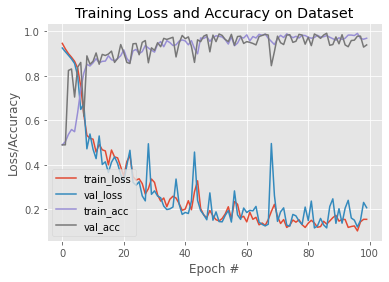

In [11]:
# построим график функции потерь при обучении и точности
# plot the training loss and accuracy
N = args["epochs"]
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
plt.show()

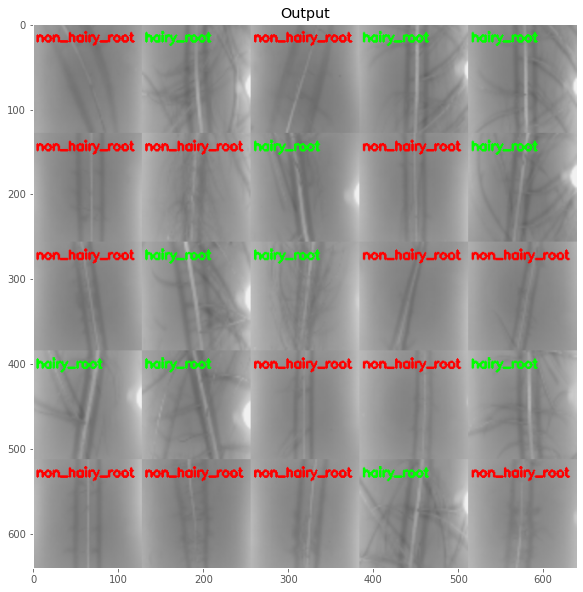

In [12]:
# случайным образом выбираем несколько тестовых изображений и затем инициализируем выходной
# набор изображений
# randomly select a few testing images and then initialize the output
# set of images
idxs = np.arange(0, testY.shape[0])
idxs = np.random.choice(idxs, size=(25,), replace=False)
images = []

# перебираем тестовые индексы
# loop over the testing indexes
for i in idxs:
    # возьмем текущее тестовое изображение и классифицируем его
	# grab the current testing image and classify it
	image = np.expand_dims(testX[i], axis=0)
	preds = model.predict(image)
	j = preds.argmax(axis=1)[0]
	label = le.classes_[j]

    # нормируем изображение в диапазоне [0, 255], а затем изменяем его размер так, чтобы
	# мы могли легче визуализировать это
	# rescale the image into the range [0, 255] and then resize it so
	# we can more easily visualize it
	output = (image[0] * 255).astype("uint8")
	output = np.dstack([output] * 3)
	output = cv2.resize(output, (128, 128))

    # рисуем цветную метку класса на выходном изображении и добавляем ее в
	# набор выходных изображений
	# draw the colored class label on the output image and add it to
	# the set of output images
	color = (0, 0, 255) if "non" in label else (0, 255, 0)
	cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
		color, 2)
	images.append(output)

# создаем коллаж из изображений размером 128x128 с 5 строками и 5 столбцами
# create a montage using 128x128 "tiles" with 5 rows and 5 columns
montage = build_montages(images, (128, 128), (5, 5))[0]

# показать выходной коллаж
# show the output montage
plt_imshow("Output", montage)